# Solving for current in R-L-C circuit

In [318]:
#importing all required modules
#important otherwise pop-up window may not work
%matplotlib inline 
import numpy as np
import scipy as sp
from scipy.integrate import odeint, ode, romb, cumtrapz
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import *
import seaborn
from IPython.display import Image

#bokeh
from bokeh.plotting import figure, output_file, output_notebook, show

Auxiliary variables definition

In [319]:
# RMS value of voltage
u = 230 

#time vector
t = np.linspace(0,0.4, 1000)

#frequency & angular frequency
f = 50
omega = 2 * pi * f

#Resitance
R = 5

#Inductance
L = 0.1
XL = 2*pi*f*L

#Capacitance (worth to consider 0.01 - two inertia)
C = 0.001
XC = 1/(omega*C)

#Phase angle
phi=atan((XL-XC)/R)

#closing angle [rad]
alpha = 0

In [320]:
XL, XC

(31.415926535897935, 3.183098861837907)

## RLC circuit fed with dc voltage

Voltage is given as:

In [321]:
ua = [u for k in t]

In [322]:
#definition of the function dp/dt

def di(y,t):
    #x = i, p = di/dt
    x, p = y[0], y[1]
    
    dx = p
    dp = 1/L*(-R*p-(1/C)*x)
    
    return [dx, dp]
    
    

In [323]:
#initial state

#initial capacitor voltage
uc0 = 0

y0 = [0.0, 1/L*(u-uc0)]

In [324]:
y0

[0.0, 2300.0]

In [325]:
I = odeint(di, y0, t)

In [326]:
ia = I[:,0]

In [327]:
# Capacitor voltage definition:
duc = ia/C

In [328]:
uc = cumtrapz(duc, dx=0.4/1000, initial=0)

In [329]:
# after integration vectors t and uc had different lengths so I need to append one item
np.append(uc, uc[999])

array([  0.00000000e+00,   1.82304017e-01,   7.25313308e-01, ...,
         2.29731263e+02,   2.29731630e+02,   2.29731630e+02])

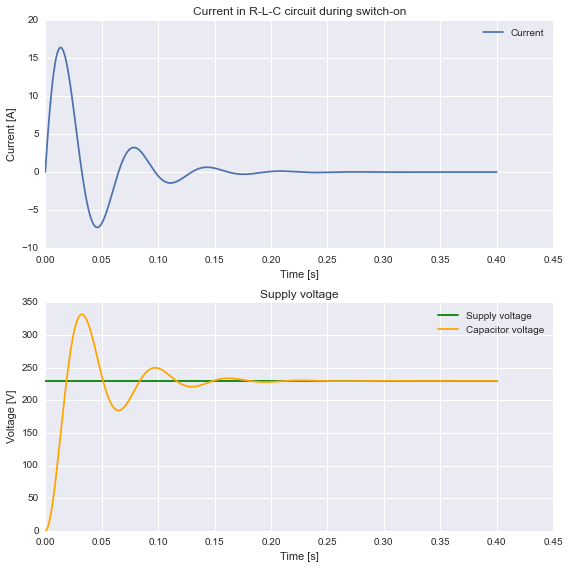

In [330]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

ax[0].plot(t,ia, label="Current")
ax[0].set_ylabel("Current [A]")
ax[0].set_xlabel("Time [s]")
ax[0].set_title("Current in R-L-C circuit during switch-on")
ax[0].legend()

ax[1].plot(t,ua, label="Supply voltage", color="green")
ax[1].plot(t,uc, label="Capacitor voltage", color="orange")
ax[1].set_ylabel("Voltage [V]")
ax[1].set_xlabel("Time [s]")
ax[1].set_title("Supply voltage")
ax[1].legend()

fig.tight_layout()

In [331]:
#checking damping factor: if below 1 - underdamped, if above 1 - overdamped
damp = (R/2)*sqrt(C/L)
damp

0.2

## RLC Circuit with sinusoidal voltage

Now voltage is given as:

In [332]:
ub = [sqrt(2)*u*sin(omega*k + alpha) for k in t]

RLC circuit is governed by the following formulas:

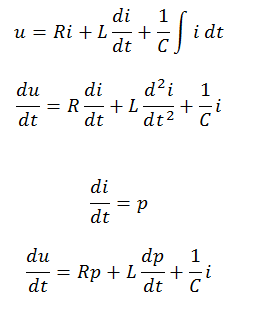

In [333]:
Image(filename="formula_1.png")

To put the last equation in order:

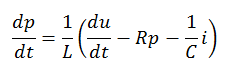

In [334]:
Image(filename="formula_2.png")

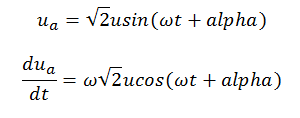

In [335]:
Image(filename="formula_3.png")

In [336]:
# definition of the function dp/dt

def di(y,t):
    #x = i, p = di/dt
    x, p = y[0], y[1]
    
    dx = p
    dp = 1/L*(omega*sqrt(2)*u*cos(omega*t + alpha)-R*p-(1/C)*x)
    
    return [dx, dp]

In [337]:
#initial state

#initial capacitor voltage
uc0 = 0

y0 = [0.0, 1/L*(ua[0]-uc0)]

In [338]:
I = odeint(di, y0, t)

In [339]:
ib = I[:,0]

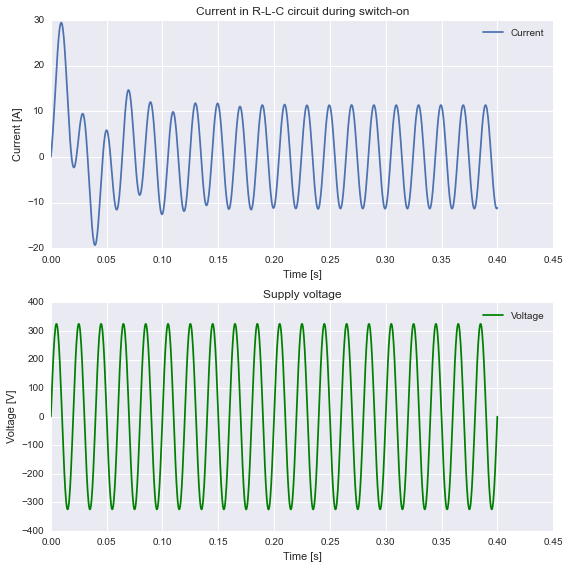

In [340]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

ax[0].plot(t,ib, label="Current")
ax[0].set_ylabel("Current [A]")
ax[0].set_xlabel("Time [s]")
ax[0].set_title("Current in R-L-C circuit during switch-on")
ax[0].legend()

ax[1].plot(t,ub, label="Voltage", color="green")
ax[1].set_ylabel("Voltage [V]")
ax[1].set_xlabel("Time [s]")
ax[1].set_title("Supply voltage")
ax[1].legend()

fig.tight_layout()

In [341]:
#checking the amplitude value in steady state

Im = sqrt(2)*u/(sqrt(R**2+(XL-XC)**2))
Im

11.344424662425405